In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('iris.csv')

In [4]:
df.head(10)

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa

In [57]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
df['Species'] = Le.fit_transform(df['Species'])

In [6]:
df[['Species']].value_counts()

Species
0          50
1          50
2          50
dtype: int64

In [7]:
df.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [62]:
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0

In [8]:
df.drop('Id',axis = 1,inplace=True)

In [9]:
X = df.drop('Species',axis = 1)
y = df['Species']

In [65]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [66]:
X

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]

In [10]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=4)

In [16]:
y_train.value_counts()

2    35
0    35
1    35
Name: Species, dtype: int64

In [17]:
from sklearn.linear_model import LogisticRegression

In [19]:
log_reg = LogisticRegression(max_iter=800)

In [20]:
log_reg = log_reg.fit(X_train,y_train)

In [21]:
pred = log_reg.predict(X_test)

In [22]:
pred

array([0, 1, 2, 1, 0, 2, 2, 1, 0, 1, 2, 0, 0, 1, 0, 2, 2, 0, 2, 0, 2, 2,
       1, 1, 0, 2, 0, 0, 2, 0, 0, 2, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1,
       1])

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(y_test, pred)

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 15]], dtype=int64)

In [77]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [79]:
pred1 = log_reg.predict(X_train)

In [80]:
print(classification_report(y_train, pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.97      0.94      0.96        35
           2       0.94      0.97      0.96        35

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105



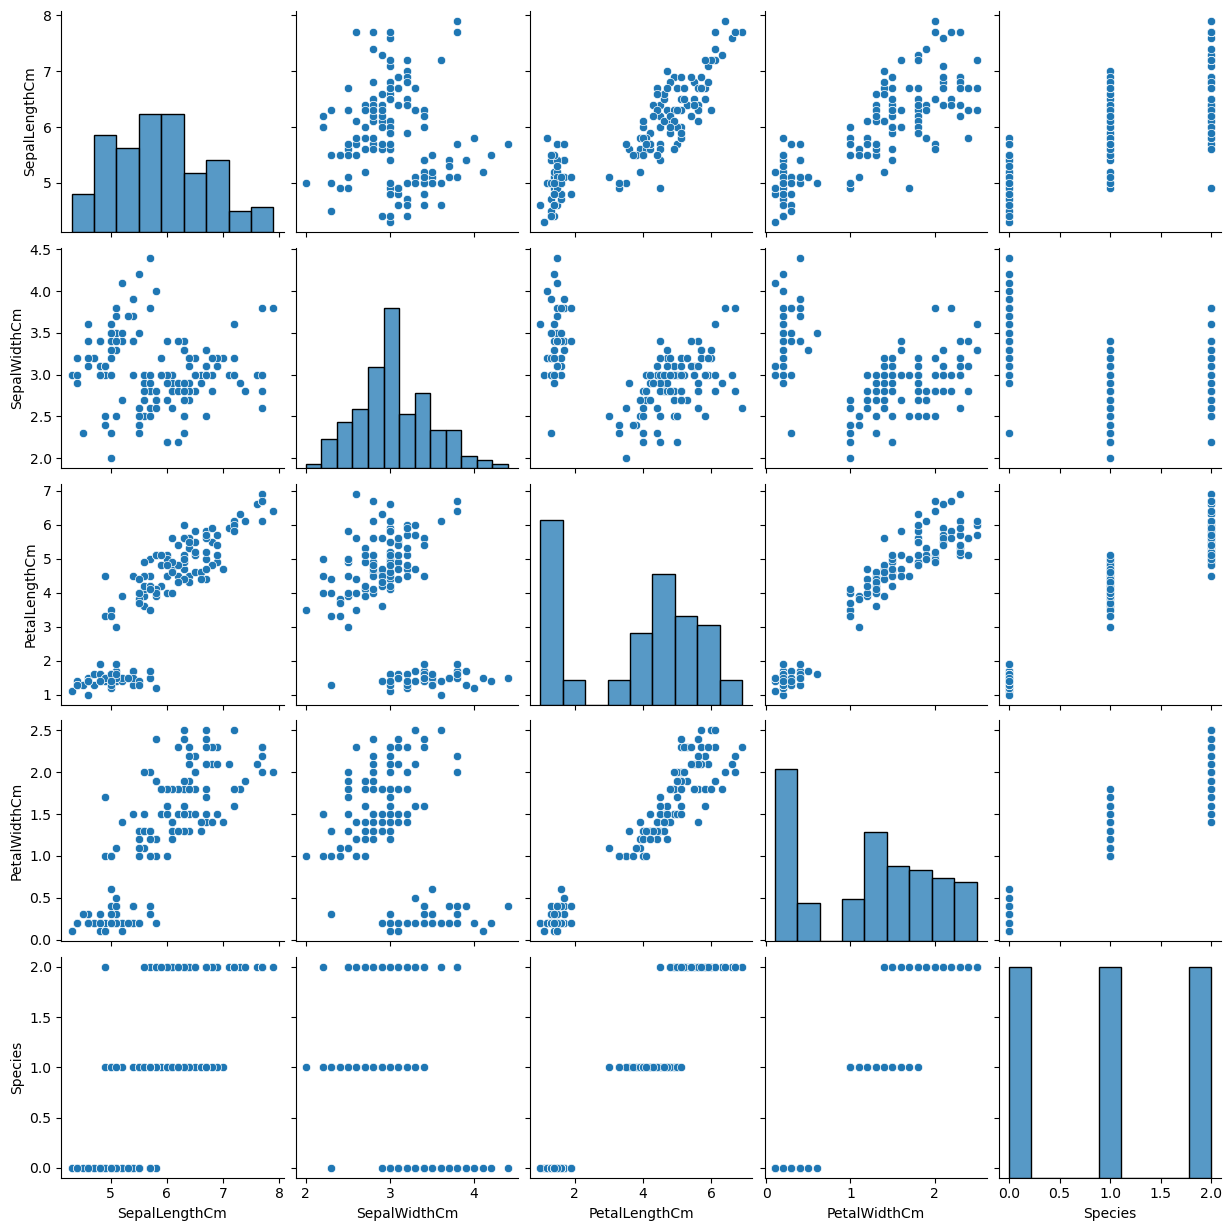

In [81]:
sns.pairplot(df)